# House Price Regression Challenge

**Author**: Martin J Page   
**Date**: 25 September 2020    

**Objective**: Build a regression model to that can predict the price of a house in Cape Town, South Africa from basic features scraped from the web.  

**Data**:   
House price data were scraped from property24.com and sahometraders.co.za, using the search criteria
"Cape Town", as well as the property types "House", "Apartment", and "Townhouse". The resulting search
pages were the inputs for the web scaper. The web scarping code for [property24.com](https://raw.githubusercontent.com/martinjpage/DSI_houseprice/master/Web%20Scaping_Property%2024.py) and
[sahometraders.co.za](https://raw.githubusercontent.com/martinjpage/DSI_houseprice/master/Web%20Scraping_SA%20Hometraders.py) are available on the author's [GitHub](https://github.com/martinjpage/DSI_houseprice). The data were then cleaned and
formatted and the two dataframes were merged, with 11970 observations, with this [code](https://raw.githubusercontent.com/martinjpage/DSI_houseprice/master/Data%20Cleaning.py). This yielded 5 numeric
variables: `price` (the target), `bedroom`, `bathroom`, `garage` (which are the number of the respective objects
in the house) and `floorSize` (which the size of the house in square metres); as well as two
categorical variabels: `location` (the suburb where the house is located) and `propertyType`,
either `House`, `Apartment` or `Townhouse` as defined by the property websites.

**Data Processing**   
In this notebook, the formatted data are explored and processed for modelling. The `propertyType` levels "House" and "Townhouse" were combined into one variable called "House". Observations belonging to a `location` with fewer than 80 examples in the dataset were removed. All the numeric data were skewed to the right and transformed using a log transformation. Missing numeric values were imputed using the column mean. Categorical variables were encoded as dummy variables. The processed data was split into a target (`y`) and features (`X`) set and then into train (80%) and test (20%) datasets for modelling.   

**Modelling**    
The below models were explored using cross-validation and scored using RMSE. Select hyperparameters were tuned.   
  1. Linear regression (no tuning)   
  2. Ridge regression (tuning of alpha)   
  3. Lasso regression (tuning of alpha)  
  4. Random forest regression (tuning of max_depth, min_samples_leaf, min_samples_split, n_estimators)   
  
**Evaluation**   
The best tuning parameter for regularised regression with `alpha = 0`. Therefore the standard linear regression and the random forest regression models were compared on the hold-out data set. Random forest produced the lowest RMSE on the test set at R5 554 764 (predictions were exponentiated to be on the orginal scale). This output was judged to be very poor. One issue might be that even after the log transformation, several variables still did not appear approximately normally distributed. However, a potent reason for the poor predictive performance of the models may be that the features do not offer enough discriminatory ability and do not capture some essential driver(s) of house prices: that is, houses with a similar number of bedrooms, bathrooms, etc. are priced very differently.   

**Note**: to use the notebook, start by running the library code block at the end

## Data Loading   


In [170]:
!pwd

/c/Users/Martin/OneDrive/Documents/Repos/DSI/Regression Twist Challenge


In [215]:
housePrice = pd.read_csv("HousePrice_Final.csv")

**or** load by url

In [ ]:
# url = "https://raw.githubusercontent.com/martinjpage/DSI_houseprice/master/HousePrice_Final.csv"
# housePrice = pd.read_csv(url)

## Data Exploration
Examine the structure of the data

In [172]:
housePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 7 columns):
price           11970 non-null float64
location        11970 non-null object
bedroom         11770 non-null float64
bathroom        11367 non-null float64
garage          8171 non-null float64
floorSize       10566 non-null float64
propertyType    11970 non-null object
dtypes: float64(5), object(2)
memory usage: 654.7+ KB


Look at the summary statistics of the numerical columns

In [173]:
housePrice.describe()

,price,bedroom,bathroom,garage,floorSize
count,1.197000e+04,11770.000000,11367.000000,8171.000000,10566.000000
mean,6.404230e+06,2.706415,2.127210,2.091237,229.348931
std,9.023614e+06,1.589975,1.482776,1.769116,232.886255
min,1.990000e+05,0.500000,0.500000,1.000000,17.000000
25%,1.950000e+06,2.000000,1.000000,1.000000,68.000000
50%,3.250000e+06,2.000000,2.000000,2.000000,116.000000
75%,6.950000e+06,3.000000,3.000000,2.000000,318.750000
max,1.725000e+08,33.000000,30.000000,58.000000,2203.000000


Look at the correlations between the numerical features

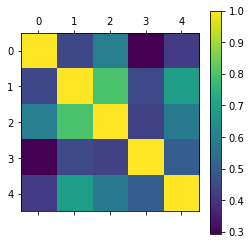

In [216]:
plt.matshow(housePrice.corr()); plt.colorbar(); plt.show()

Look at the distribution of the numeric variables

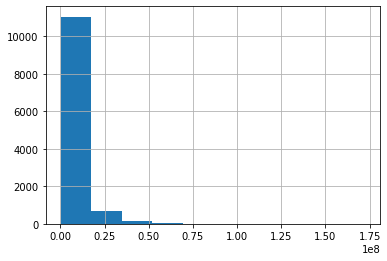

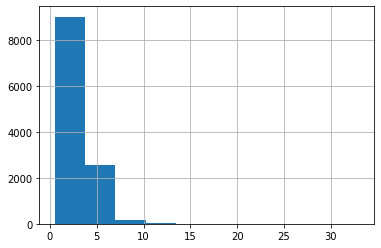

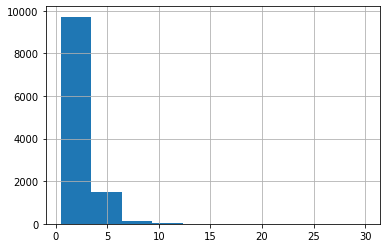

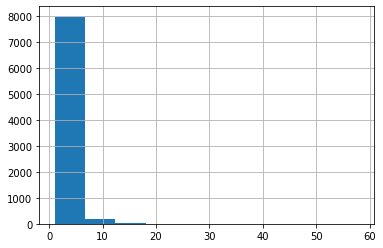

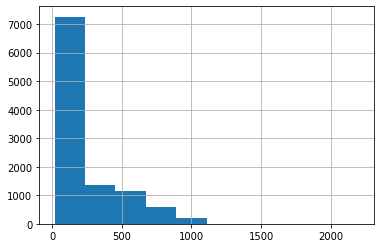

In [175]:
housePrice.iloc[:,0].hist(); plt.show()
housePrice.iloc[:,2].hist(); plt.show()
housePrice.iloc[:,3].hist(); plt.show()
housePrice.iloc[:,4].hist(); plt.show()
housePrice.iloc[:,5].hist(); plt.show()

Look the the counts of the categorical features

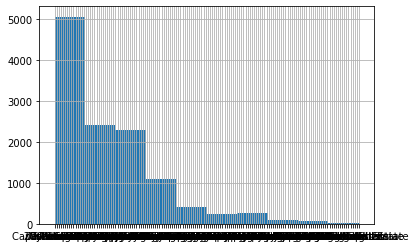

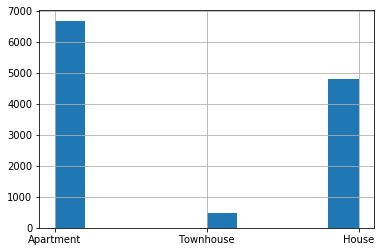

In [176]:
housePrice.iloc[:,1].hist(); plt.show()
housePrice.iloc[:,6].hist(); plt.show()

## Data Processing

Combine house and townhouse as one group

In [177]:
housePrice["propertyType"] = housePrice["propertyType"].str.replace("Townhouse", "House")

Look at summmary statistics by property type

In [178]:
housePrice.groupby(by = "propertyType").describe().transpose()

propertyType        Apartment         House
price     count  6.683000e+03  5.287000e+03
          mean   4.681921e+06  8.581305e+06
          std    6.368804e+06  1.116271e+07
          min    2.450000e+05  1.990000e+05
          25%    1.700000e+06  2.595000e+06
          50%    2.640000e+06  4.850000e+06
          75%    4.550000e+06  9.992500e+06
          max    7.500000e+07  1.725000e+08
bedroom   count  6.486000e+03  5.284000e+03
          mean   1.838961e+00  3.771196e+00
          std    8.262319e-01  1.654062e+00
          min    5.000000e-01  5.000000e-01
          25%    1.000000e+00  3.000000e+00
          50%    2.000000e+00  3.000000e+00
          75%    2.000000e+00  4.000000e+00
          max    1.500000e+01  3.300000e+01
bathroom  count  6.424000e+03  4.943000e+03
          mean   1.553004e+00  2.873457e+00
          std    8.894789e-01  1.744338e+00
          min    5.000000e-01  1.000000e+00
          25%    1.000000e+00  2.000000e+00
          50%    1.000000e+00  2.500000e+00
          75%    2.000000e+00  3.500000e+00
          max    2.500000e+01  3.000000e+01
garage    count  3.850000e+03  4.321000e+03
          mean   1.393636e+00  2.712798e+00
          std    6.952861e-01  2.160600e+00
          min    1.000000e+00  1.000000e+00
          25%    1.000000e+00  2.000000e+00
          50%    1.000000e+00  2.000000e+00
          75%    2.000000e+00  3.000000e+00
          max    1.500000e+01  5.800000e+01
floorSize count  6.430000e+03  4.136000e+03
          mean   9.998323e+01  4.304663e+02
          std    8.315840e+01  2.476696e+02
          min    1.700000e+01  2.600000e+01
          25%    5.600000e+01  2.120000e+02
          50%    7.800000e+01  4.100000e+02
          75%    1.100000e+02  5.970000e+02
          max    2.203000e+03  9.980000e+02

The numerical variables appear to have a non-normal distribution. Check for skewness quantiatively
and perform a log transformation

In [179]:
#log transform target (price)
housePrice.iloc[:,0] = np.log1p(housePrice.iloc[:,0])

In [180]:
#make a list of the numerical columns
numeric_feats = housePrice.dtypes[housePrice.dtypes != "object"].index

In [181]:
numeric_feats

Index(['price', 'bedroom', 'bathroom', 'garage', 'floorSize'], dtype='object')

In [182]:
#check for positive skewness
skewed_feats = housePrice[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75].index

In [183]:
skewed_feats

Index(['bedroom', 'bathroom', 'garage', 'floorSize'], dtype='object')

In [184]:
#overwrite skewed columns with log transformation
housePrice[skewed_feats] = np.log1p(housePrice[skewed_feats])

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [185]:
housePrice.describe()

,price,bedroom,bathroom,garage,floorSize
count,11970.000000,11770.000000,11367.000000,8171.000000,10566.000000
mean,15.165514,1.234756,1.062287,1.035614,4.990430
std,0.935578,0.382144,0.372243,0.392457,0.931751
min,12.201065,0.405465,0.405465,0.693147,2.890372
25%,14.483340,1.098612,0.693147,0.693147,4.234107
50%,14.994166,1.098612,1.098612,1.098612,4.762174
75%,15.754252,1.386294,1.386294,1.098612,5.767539
max,18.965908,3.526361,3.433987,4.077537,7.698029


See distributions of log transformed columns

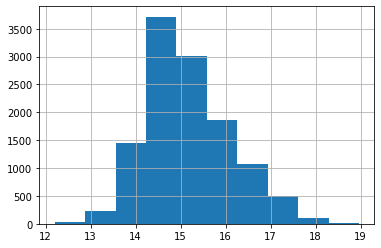

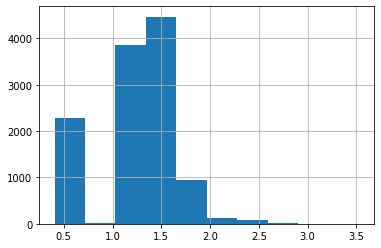

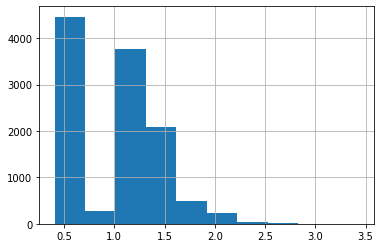

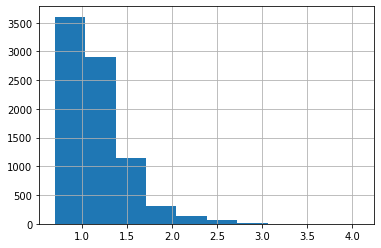

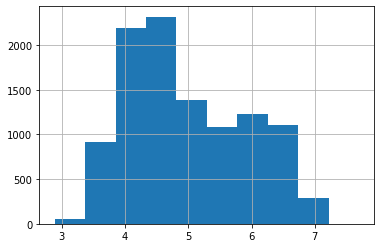

In [186]:
housePrice.iloc[:,0].hist(); plt.show()
housePrice.iloc[:,2].hist(); plt.show()
housePrice.iloc[:,3].hist(); plt.show()
housePrice.iloc[:,4].hist(); plt.show()
housePrice.iloc[:,5].hist(); plt.show()

Fill the missing numerical values with the mean of that column

In [187]:
housePrice[numeric_feats] = housePrice[numeric_feats].fillna(housePrice[numeric_feats].mean())

Remove rows that belong to a suburb with fewer than 80 houses

In [188]:
#generate a Boolean list for the levels of the location variable that
#have a prevalence of more than 80
location_mask = housePrice["location"].value_counts() > 80
#extract the names of the suburbs that appear more than 80 ties
locations = location_mask.index[location_mask]
#generate a boolean mask to filter the rows based on the location column
bool_loc = []
for loc in housePrice["location"]:
    bool_loc.append(loc in locations)
#remove rows with suburbs with too little data
housePrice = housePrice[bool_loc]

Encode the categorical features as dummy variables. Drop first to avoid duplicate information.

In [189]:
housePrice = pd.get_dummies(housePrice, drop_first=True)

In [154]:
housePrice.head()

,price,bedroom,bathroom,garage,floorSize,location_Camps Bay,location_Cape Town City Centre,location_Claremont,location_Claremont Upper,location_Clifton,...,location_Tamboerskloof,location_Three Anchor Bay,location_Tokai,location_Vredehoek,location_Waterfront,location_Woodstock,location_Wynberg,location_Wynberg Upper,location_Zonnebloem,propertyType_House
0,-0.815329,-0.356278,-0.991708,-0.872676,2.747319e-16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.417367,0.396565,0.870458,0.160532,5.869914e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.875485,-0.356278,0.097590,0.160532,1.932514e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.352046,0.396565,0.511721,0.893605,-5.236406e-02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.471303,0.396565,0.870458,0.893605,2.747319e-16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Modelling


Split the data into target (y) and features (X)

In [190]:
X = housePrice.iloc[:,1:]
y = housePrice.iloc[:,0]

In [191]:
X.head()

,bedroom,bathroom,garage,floorSize,location_Camps Bay,location_Cape Town City Centre,location_Claremont,location_Claremont Upper,location_Clifton,location_Constantia,...,location_Tamboerskloof,location_Three Anchor Bay,location_Tokai,location_Vredehoek,location_Waterfront,location_Woodstock,location_Wynberg,location_Wynberg Upper,location_Zonnebloem,propertyType_House
0,1.098612,0.693147,0.693147,4.990430,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.386294,1.386294,1.098612,5.537334,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1.098612,1.098612,1.098612,5.170484,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.386294,1.252763,1.386294,4.941642,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.386294,1.386294,1.386294,4.990430,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [192]:
y.head()

0    14.402742
1    15.555977
2    15.984564
3    14.836162
4    15.606437
Name: price, dtype: float64

Partition the data in a training and test set to perform a final evaluation of the models on a hold-out set

In [193]:
#set the seed for all models
SEED = 2509

In [194]:
#make train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

Define a function that will perform cross validation on a model and computes the root mean squared error

In [196]:
def rmse_cv(model):
    rmse = np.sqrt(np.abs(cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)))
    return(rmse)

### Model 1: Linear Regression

In [197]:
#instantiate linear regression model
linreg = LinearRegression()
#run cross validation function to obtain the RMSE
cv_linreg = rmse_cv(linreg).mean()
print("CV RMSE for Linear Regression", cv_linreg)

CV RMSE for Linear Regression 0.35861158575254304


Fit linear regression model directly for test set prediction

In [198]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model 2: Ridge Regression   

In [199]:
#define hyperparameters to test
alphas = np.arange(0.0000, 1, 0.05)

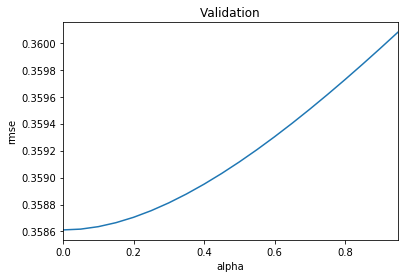

In [200]:
#use list comprehension to iterate through the hyperparameters and obtain CV RMSE using the defined RMSE model function
cv_ridge = [rmse_cv(Ridge(alpha = alf)).mean() for alf in alphas]
cv_ridge = pd.Series(cv_ridge, index=alphas)

#plot searched hyperparamters vs RMSE
cv_ridge.plot(title = "Validation"); plt.xlabel("alpha"); plt.ylabel("rmse"); plt.show()

In [201]:
print("CV RMSE for Ridge Regression",cv_ridge.min())

CV RMSE for Ridge Regression 0.35861158575254304


### Model 3: Lasso Regression   

C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412.9122707289364, tolerance: 0.528479113156257
  positive)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Mar

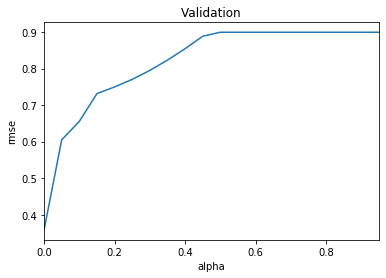

In [202]:
#use list comprehension to iterate through the hyperparameters and obtain CV RMSE using the define RMSE model function
cv_lasso = [rmse_cv(Lasso(alpha = alf)).mean() for alf in alphas]
cv_lasso = pd.Series(cv_lasso, index=alphas)

#plot searched hyperparamters vs RMSE
cv_lasso.plot(title = "Validation"); plt.xlabel("alpha"); plt.ylabel("rmse"); plt.show()

In [203]:
print("CV RMSE for Lasso Regression",cv_lasso.min())

CV RMSE for Lasso Regression 0.35861158575254304


Fit the lasso model directly to plot the coefficients to see which features are important

C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.6958350165528, tolerance: 0.44236523293124286
  tol, rng, random, positive)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Martin\Anaconda

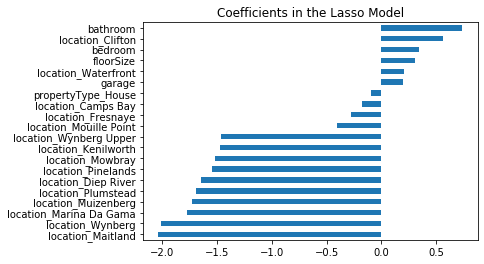

In [210]:
model_lasso = LassoCV(alphas = alphas).fit(X_train, y_train)

coef = pd.Series(model_lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
imp_coef.plot(kind = "barh"); plt.title("Coefficients in the Lasso Model"); plt.show()

### Model 4: Random Forest Regression

In [204]:
#instantiate mode
rf = RandomForestRegressor(random_state = SEED)

#find best hyperparameters
params_rf = {'max_depth': [3, 8, 15, None],
              'max_features': ['auto'],
              "min_samples_leaf": [1, 5, 10],
              "min_samples_split": [5, 15, 30],
              'n_estimators': [100, 300]}

grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 3, verbose = 2, n_jobs = None, scoring = "neg_mean_squared_error")
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=   1.0s
[CV] max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=   1.0s
[CV] max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300, total=   1.0s
[CV] max_depth=3, max_features=auto, min_samples_leaf=1, min_

[CV]  max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=300, total=   1.0s
[CV] max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=300 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=300, total=   1.0s
[CV] max_depth=3, max_features=auto, min_sam

[CV]  max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300, total=   2.2s
[CV] max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300 
[CV]  max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300, total=   2.2s
[CV] max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300 
[CV]  max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300, total=   2.2s
[CV] max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=30, n_estimators=100 
[CV]  max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=30, n_estimators=100, total=   0.7s
[CV] max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=30, n_estimators=100 
[CV]  max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=30, n_estimators=100, total=   0.7s
[CV] max_depth=8, max_features=auto, min_samples_lea

[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=30, n_estimators=100, total=   1.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=30, n_estimators=100 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=30, n_estimators=100, total=   1.0s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=30, n_estimators=300 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=30, n_estimators=300, total=   3.2s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=30, n_estimators=300 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=30, n_estimators=300, total=   3.1s
[CV] max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=30, n_estimators=300 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=30, n_estimators=300, total=   3.1s
[CV] max_depth=15, max_features=auto, min_s

[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=300, total=   2.8s
[CV] max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=300 
[CV]  max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=300, total=   2.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   1.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   1.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   1.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=300 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=300, total=   3.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=300 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=300, total=   3.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=300 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=300, total=   3.1s
[CV] max_depth=None, max_

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  5.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=2509,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 8, 15, None],


In [205]:
grid_rf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [206]:
print("CV RMSE for Random Forest Regression", np.sqrt(np.abs(grid_rf.best_score_)))

CV RMSE for Random Forest Regression 0.31763582021072895


Save best random forest model

In [207]:
best_rf = grid_rf.best_estimator_

Plot the important features of the random forest

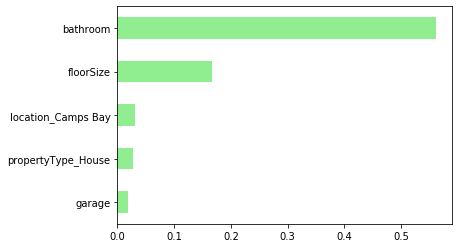

In [221]:
#create pd.Series of features importances
importances_rf = pd.Series(best_rf.feature_importances_, index = X.columns)

#sort importance_rf
sorted_importances_rf = importances_rf.sort_values()

#make horizontal bar plot
sorted_importances_rf[-5:].plot(kind = "barh", color = "lightgreen"); plt.show()

## Test set evaluation

Linear regression model prediction

In [208]:
linreg_pred = linreg.predict(X_test)
print("Test RMSE for Linear Regression",MSE(np.expm1(y_test), np.expm1(linreg_pred))**(0.5))

Test RMSE for Linear Regression 6408568.32673033


Random forest model prediction

In [209]:
rf_pred = grid_rf.predict(X_test)
print("Test RMSE for Random Forest Regression",MSE(np.expm1(y_test), np.expm1(rf_pred))**(0.5))

Test RMSE for Random Forest Regression 5554763.841721576


#### Libraries
Load these first to run the script

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE